In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-dataset-csv/hotel_bookings 2.csv


Kütüphanelermizi içe aktarıyoruz.

numPy: matematiksel işlemler ve boyutlu diziler için

pandas: veri manipülasyonu ve analizine 

os: dosya işlemleri

seaborn: gelişmiş görselleştirme

ploty express: dinamik grafikler için

matplotlib.pyplot: klasik veri görselleştirme.

In [4]:
import numpy as np

import pandas as pd

import os

import seaborn as ns 

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

Veriyi yüklemek ve çalıştırmak için:

In [5]:
df = pd.read_csv(filepath_or_buffer = "/kaggle/input/hotel-booking-dataset-csv/hotel_bookings 2.csv")
df = df.copy()
#df.copy() orijinal veriyi korumak için yazılır.

Veri setine eksik değerler eklemek için:

In [6]:
import random
import numpy as np

# Veri setine rastgele eksik değerler ekleyen fonksiyon
def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)  # Satır seçimi
        col_idx = random.randint(0, dataframe.shape[1] - 1)  # Sütun seçimi
        df_missing.iat[row_idx, col_idx] = np.nan  # NaN ekle

    return df_missing

# Eksik veri içeren DataFrame oluşturma
df_with_missing_values = add_random_missing_values(df, missing_rate=0.05)

# İlk 5 satırı görüntüleme
print(df_with_missing_values.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0      342.0             2015.0               July   
1  Resort Hotel          0.0      737.0             2015.0               July   
2  Resort Hotel          0.0        7.0             2015.0               July   
3  Resort Hotel          NaN       13.0             2015.0               July   
4  Resort Hotel          0.0       14.0             2015.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                      27.0                        1.0   
1                      27.0                        1.0   
2                      27.0                        1.0   
3                      27.0                        1.0   
4                      27.0                        1.0   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                      0.0                   0.0     2.0  ...    No Deposit   
1     

In [7]:
#Verinin ilk üç satırı
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


In [8]:
df.shape
#dataFramenin boyutlarnı döndürüyor.

(119390, 32)

In [9]:
df.columns
#dataFramenin sütun adlarını döndürür

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.head(10)
#dataFramenin ilk 10 satırını gösterir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [11]:
df.tail(10)
#veriSetinin son 10 satırını gösterir.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,4/9/2017
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,5/9/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,5/9/2017
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,6/9/2017
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,6/9/2017
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [12]:
df.describe()
#DataFramedeki sayısal sütunların temel istatistiksel özetini veriyor.
#Veri analizi yaparken veriyi hızlıca anlamamızı sağlıyor.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
df.info()
#her sütunun veri tipi,veri tiplerinin sayısal dağılımı, eksik değerler ve sütunların kaç olduğu bilgisini görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
#her sütunun veri tipini görmek için:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Burda sütun isimlerini türkçe yapma istediğim için değiştireceğim.

In [15]:
df.rename(columns={
    "hotel": "otel",
    "is_canceled": "iptal_edildi",
    "lead_time": "önceden_rezervasyon_süresi",
    "arrival_date_year": "geliş_yılı",
    "arrival_date_month": "geliş_ay",
    "arrival_date_week_number": "geliş_hafta_numarası",
    "arrival_date_day_of_month": "geliş_günü",
    "stays_in_weekend_nights": "hafta_sonu_gece_sayısı",
    "stays_in_week_nights": "hafta_içi_gece_sayısı",
    "adults": "yetişkin_sayısı",
    "children": "çocuk_sayısı",
    "babies": "bebek_sayısı",
    "meal": "yemek_durumu",
    "country": "ülke",
    "market_segment": "pazar_segmenti",
    "distribution_channel": "dağıtım_kanalı",
    "is_repeated_guest": "tekrarlanan_müşteri",
    "previous_cancellations": "önceki_iptaller",
    "previous_bookings_not_canceled": "önceki_iptal_edilmeyen_rezervasyonlar",
    "availability_365": "365_gün_available",
    "reservation_status": "rezervasyon_durumu",
    "reservation_status_date": "rezervasyon_durumu_tarihi",
    "deposit_type": "depozito_tipi",
    "agent": "seyahat_acentesi",
    "company": "şirket",
    "days_in_waiting_list": "bekleme_listesinde_geçen_günler",
    "customer_type": "müşteri_tipi",
    "adr": "günlük_ortalama_fiyat",
    "required_car_parking_spaces": "gereken_araba_park_yeri_sayısı",
    "total_of_special_requests": "özel_talep_sayısı"
}, inplace=True)


# Değişiklikleri kontrol et
print(df.head())

           otel  iptal_edildi  önceden_rezervasyon_süresi  geliş_yılı  \
0  Resort Hotel             0                         342        2015   
1  Resort Hotel             0                         737        2015   
2  Resort Hotel             0                           7        2015   
3  Resort Hotel             0                          13        2015   
4  Resort Hotel             0                          14        2015   

  geliş_ay  geliş_hafta_numarası  geliş_günü  hafta_sonu_gece_sayısı  \
0     July                    27           1                       0   
1     July                    27           1                       0   
2     July                    27           1                       0   
3     July                    27           1                       0   
4     July                    27           1                       0   

   hafta_içi_gece_sayısı  yetişkin_sayısı  ...  depozito_tipi  \
0                      0                2  ...     No Deposit  

In [16]:
#Eksik değerlerin belirlenmesi
#Hangi sütunlarda eksik değerler olduğunu görmek için:

missing_values=df.isnull().sum()
print(missing_values)


otel                                          0
iptal_edildi                                  0
önceden_rezervasyon_süresi                    0
geliş_yılı                                    0
geliş_ay                                      0
geliş_hafta_numarası                          0
geliş_günü                                    0
hafta_sonu_gece_sayısı                        0
hafta_içi_gece_sayısı                         0
yetişkin_sayısı                               0
çocuk_sayısı                                  4
bebek_sayısı                                  0
yemek_durumu                                  0
ülke                                        488
pazar_segmenti                                0
dağıtım_kanalı                                0
tekrarlanan_müşteri                           0
önceki_iptaller                               0
önceki_iptal_edilmeyen_rezervasyonlar         0
reserved_room_type                            0
assigned_room_type                      

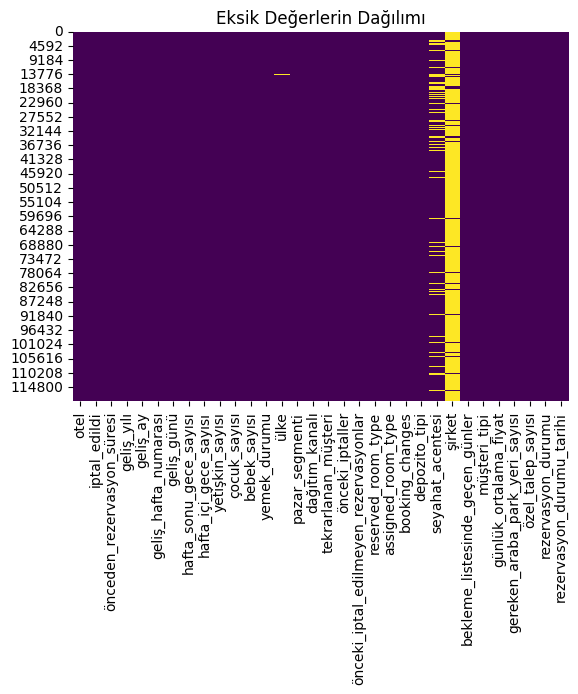

In [17]:
#Eksik değerlerin görselleştirilmesi
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Değerlerin Dağılımı")
plt.show()

Grafik geneline bakıldığında, birçok sütunun eksiksiz veri içerdiği görülüyor. Eksik değerler yalnızca birkaç sütunda yoğunlaşmış durumda.



Burda eksik verileri doldurmak istiyorum.

In [18]:
#"çocuk sayısı" sütununu medyan ile dolduracağım.

df['çocuk_sayısı'] = df['çocuk_sayısı'].fillna(df['çocuk_sayısı'].median())

#"ülke" sütununu mod ile
df['ülke'] = df['ülke'].fillna(df['ülke'].mode()[0])

#"seyahat aceentesi" sütununu mod ile
df['seyahat_acentesi'] = df['seyahat_acentesi'].fillna(df['seyahat_acentesi'].mode()[0])

# "şirket" sütunundaki eksik değerleri mod ile doldurmak
df['şirket'] = df['şirket'].fillna(df['şirket'].mode()[0])

#eksik değer kontrolü için:
print(df.isnull().sum())

otel                                     0
iptal_edildi                             0
önceden_rezervasyon_süresi               0
geliş_yılı                               0
geliş_ay                                 0
geliş_hafta_numarası                     0
geliş_günü                               0
hafta_sonu_gece_sayısı                   0
hafta_içi_gece_sayısı                    0
yetişkin_sayısı                          0
çocuk_sayısı                             0
bebek_sayısı                             0
yemek_durumu                             0
ülke                                     0
pazar_segmenti                           0
dağıtım_kanalı                           0
tekrarlanan_müşteri                      0
önceki_iptaller                          0
önceki_iptal_edilmeyen_rezervasyonlar    0
reserved_room_type                       0
assigned_room_type                       0
booking_changes                          0
depozito_tipi                            0
seyahat_ace

In [19]:
df.head()

,otel,iptal_edildi,önceden_rezervasyon_süresi,geliş_yılı,geliş_ay,geliş_hafta_numarası,geliş_günü,hafta_sonu_gece_sayısı,hafta_içi_gece_sayısı,yetişkin_sayısı,...,depozito_tipi,seyahat_acentesi,şirket,bekleme_listesinde_geçen_günler,müşteri_tipi,günlük_ortalama_fiyat,gereken_araba_park_yeri_sayısı,özel_talep_sayısı,rezervasyon_durumu,rezervasyon_durumu_tarihi
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,3/7/2015


Şimdi sütunlarımın doğru veri tipi olması için veri tipi dönüşümleri yapacağım. Sayısal formata dönüştürüyorum.

In [20]:
df['geliş_yılı'] = pd.to_numeric(df['geliş_yılı'],errors='coerce')
#errors='coerce' dönüştürülemeyen geğerleri NaN yapacak.

print(df['geliş_yılı'].head())

0    2015
1    2015
2    2015
3    2015
4    2015
Name: geliş_yılı, dtype: int64


Burda da geliş_ay sütununu kategori tipine dönüştüreceğim.

In [21]:
df['geliş_ay']=df['geliş_ay'].astype('category')

print(df['geliş_ay'].head())

0    July
1    July
2    July
3    July
4    July
Name: geliş_ay, dtype: category
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']


Tarih verilerini tarih formatına dönüştürmek için:

In [22]:
df['rezervasyon_durumu_tarihi'] = pd.to_datetime(df['rezervasyon_durumu_tarihi'],errors = 'coerce')

print(df['rezervasyon_durumu_tarihi'].head())

0   2015-01-07
1   2015-01-07
2   2015-02-07
3   2015-02-07
4   2015-03-07
Name: rezervasyon_durumu_tarihi, dtype: datetime64[ns]


In [23]:
print(df['önceden_rezervasyon_süresi'].head())

0    342
1    737
2      7
3     13
4     14
Name: önceden_rezervasyon_süresi, dtype: int64


In [24]:
print(df.dtypes)

otel                                             object
iptal_edildi                                      int64
önceden_rezervasyon_süresi                        int64
geliş_yılı                                        int64
geliş_ay                                       category
geliş_hafta_numarası                              int64
geliş_günü                                        int64
hafta_sonu_gece_sayısı                            int64
hafta_içi_gece_sayısı                             int64
yetişkin_sayısı                                   int64
çocuk_sayısı                                    float64
bebek_sayısı                                      int64
yemek_durumu                                     object
ülke                                             object
pazar_segmenti                                   object
dağıtım_kanalı                                   object
tekrarlanan_müşteri                               int64
önceki_iptaller                                 

In [25]:
df['toplamGeceSayısı'] = df['hafta_sonu_gece_sayısı'] + df['hafta_içi_gece_sayısı']
#müşterinin toplam kaç gün kaldığını görmek için

#veriyi kategoriye ayırmak için
bins = [0,30,90,365] 
#bins ifadesi değerlerin hangi aralıklara bölüneceğini belirliyor
labels = ['Kısa', 'Orta', 'Uzun']
#labels aralıkların adlarını belirledi
#pd.cut() fonku her bir önceden rezervasyon süresi değerini kategorilere yerleştirdi.
df['rezervasyon_süresi_kategorisi'] = pd.cut(df['önceden_rezervasyon_süresi'],bins = bins, labels=labels)

Toplam Rezervasyonların ne kadarının iptal edildiğini gösteren oranı vermek için.

In [26]:
print(df.columns)


Index(['otel', 'iptal_edildi', 'önceden_rezervasyon_süresi', 'geliş_yılı',
       'geliş_ay', 'geliş_hafta_numarası', 'geliş_günü',
       'hafta_sonu_gece_sayısı', 'hafta_içi_gece_sayısı', 'yetişkin_sayısı',
       'çocuk_sayısı', 'bebek_sayısı', 'yemek_durumu', 'ülke',
       'pazar_segmenti', 'dağıtım_kanalı', 'tekrarlanan_müşteri',
       'önceki_iptaller', 'önceki_iptal_edilmeyen_rezervasyonlar',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'depozito_tipi', 'seyahat_acentesi', 'şirket',
       'bekleme_listesinde_geçen_günler', 'müşteri_tipi',
       'günlük_ortalama_fiyat', 'gereken_araba_park_yeri_sayısı',
       'özel_talep_sayısı', 'rezervasyon_durumu', 'rezervasyon_durumu_tarihi',
       'toplamGeceSayısı', 'rezervasyon_süresi_kategorisi'],
      dtype='object')


In [27]:
#Toplam rezervasyonların ne kadar iptal edildiğinin oranını gösterecek.
toplam_rezervasyon = len(df)
iptal_edilenler = df['iptal_edildi'].sum()
iptal_orani = (iptal_edilenler / toplam_rezervasyon)*100
print(f"İptal Oranı: {iptal_orani * 100:.2f}%")

İptal Oranı: 3704.16%


otel
City Hotel      41.726963
Resort Hotel    27.763355
Name: iptal_edildi, dtype: float64


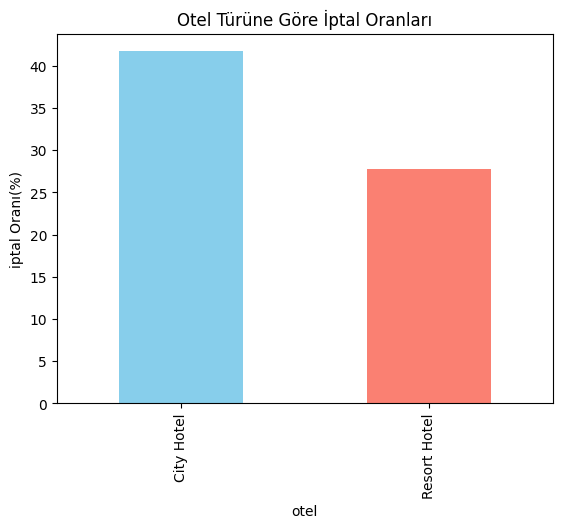

In [28]:
#Ote Türüne göre İptal Oranı
otel_turu_iptal = df.groupby('otel')['iptal_edildi'].mean()*100
print (otel_turu_iptal)
otel_turu_iptal.plot(kind = 'bar',color=['skyblue','salmon'],title="Otel Türüne Göre İptal Oranları")
plt.ylabel('iptal Oranı(%)')
plt.show()

Bu grafiğe göre City Hotel iptal oranı %40 üzerinde görünüyor. Bu durum City Hotel rezervasyonlarının daha sık iptal edildiğini gösteriyor.

Resort Hotel iptal oranı ise yaklaşık %30 civarında. Bu durum iptal oranı buralarda daha az olduğunu ifade ediyor.

City Hotel'lerinin iptal oranlarını azaltabilmek için yeni stratejiler belirlenebilir. Ayrıca otel türlerindeki bu farklar rezarvasyon iptal kuralları da etkili olabilir.

/tmp/ipykernel_30/3669657850.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iptal_oranı_kategori = df.groupby('rezervasyon_kategorisi')['iptal_edildi'].mean() * 100


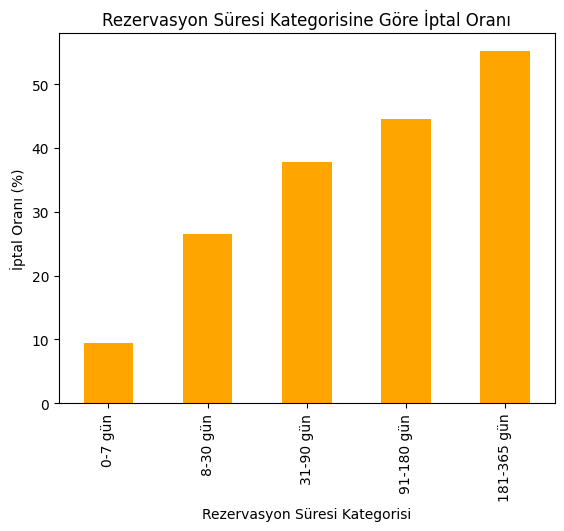

In [29]:
#Rezervasyon Süresi Kategorilerine göre İptal Oranı:

# Rezervasyon Süresi için kategori oluşturma
bins = [0, 7, 30, 90, 180, 365]  # Gün sınırları
labels = ['0-7 gün', '8-30 gün', '31-90 gün', '91-180 gün', '181-365 gün']  # Kategoriler

# Rezervasyon süresi kategorisini oluşturma
df['rezervasyon_kategorisi'] = pd.cut(df['önceden_rezervasyon_süresi'], bins=bins, labels=labels, right=False)

# Kategorilere göre iptal oranı hesaplama
iptal_oranı_kategori = df.groupby('rezervasyon_kategorisi')['iptal_edildi'].mean() * 100

# Bar grafiği çizimi
import matplotlib.pyplot as plt
iptal_oranı_kategori.plot(kind='bar', color='orange', title="Rezervasyon Süresi Kategorisine Göre İptal Oranı")
plt.ylabel('İptal Oranı (%)')
plt.xlabel('Rezervasyon Süresi Kategorisi')
plt.show()

#Hangi rezervasyonun rezervasyon sürelerinin daha fazla iptal edildiğini anlamak için faydalıdır.


Bu grafikte rezervasyon süresi uzadıkça iptal oranının arttığı görünüyor.
Uzun süreli rezervasyonlar daha fazla iptal riski taşıyor. Bu riski azaltmak için esnek rezervasyon politikaları gelişitirilebilir. (Erken rezervasyon iptali durumunda belirli bir ücret kesintisi gibi.)

/tmp/ipykernel_30/2843781528.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iptal_aylik=df.groupby('geliş_ay')['iptal_edildi'].mean()*100
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


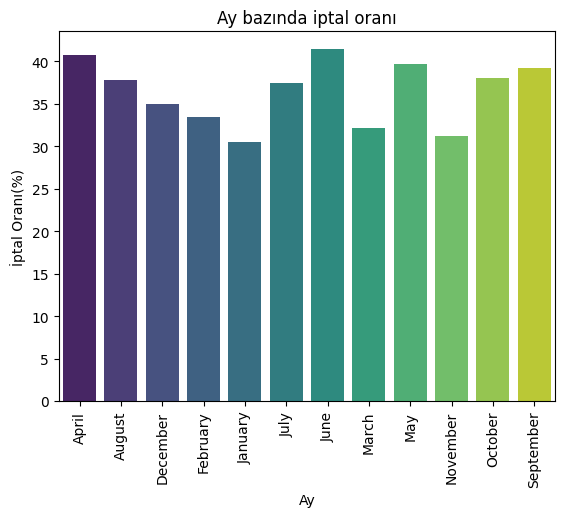

In [30]:
#Her ay için iptal oranlarını hesaplayıp bar grafiğinde görselleştirme:

iptal_aylik=df.groupby('geliş_ay')['iptal_edildi'].mean()*100
sns.barplot(x=iptal_aylik.index, y=iptal_aylik.values,palette='viridis')
plt.title("Ay bazında iptal oranı")
plt.ylabel("İptal Oranı(%)")
plt.xlabel("Ay")
# Eksen etiketlerini döndürme (90 derece)
#Daha Rahat ve okunabilir olması için
plt.xticks(rotation=90)
plt.show()

Grafiğe göre en yüksek iptal oranı Nisan ayında, en düşük iptal oranı da Kasım ayında görünüyor. İlkbahar ve yaz aylarında sonbahar ve kış aylarına göre iptal oranı genel olarak daha düşük.
İlkbahar ve yaz aylarında alternatif seyahat planları yapma olasılığı daha fazla olduğundan sonbahar ve kış aylarına göre iptaller daha fazla olabilir.

Mevsimsel iptal eğilimlerine göre stratejiler geliştirmek gerekebilir.

Şimdi "önceden rezarvasyon" süresi ile "iptal durumu"arasındaki ilişkiyi görselleştrimek için dağılım grafiği çizmek istedim.

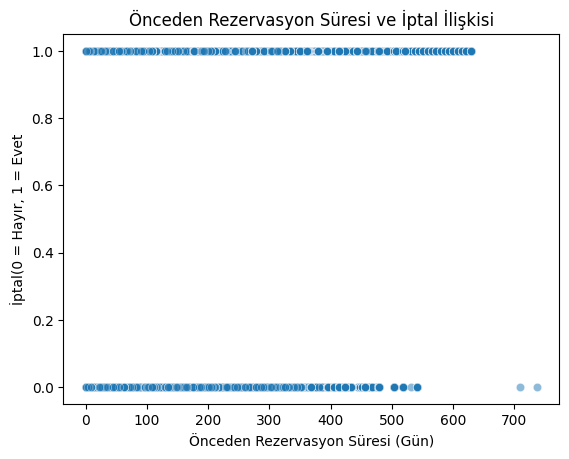

In [36]:
#Önceden Rezervasyon Süresi ve İptali
sns.scatterplot(x='önceden_rezervasyon_süresi', y='iptal_edildi',data=df, alpha=0.5)
plt.title("Önceden Rezervasyon Süresi ve İptal İlişkisi")
plt.ylabel("İptal(0 = Hayır, 1 = Evet")
plt.xlabel("Önceden Rezervasyon Süresi (Gün)")
plt.show()


x ekseni önceden rezarvasyon süresi.
y ekseni iptal durumu.
Rezervasyon iptal edilmediyse (0) olduğundan y ekseninde 0 noktasında yer alıyor; Rezervasyon iptal edildiyse(1), noktalar y ekseninde 1 notasında yer alıyor.

 Kısa sürede yapılan rezervasyonlar (x değeri küçük) genellikle daha fazla iptal ediliyorsa, y ekseninde 1'e yakın noktaların yoğun olduğunu görürsünüz.
Uzun süreli rezervasyonlar (x değeri büyük) ise daha az iptal edilirse, y ekseninde 0'a yakın noktaların yoğun olduğunu görürsünüz.

İptal edilen (1) ve iptal edilmeyen (0) rezervasyonlar kısa rezervasyon sürelerinde yoğunlaşıyor. Özellikle 0–100 gün arasında daha sık veri bulunuyor.
Rezervasyon süresi 400 günün üzerine çıktığında hem iptal edilen hem de edilmeyen durumlarda veri sayısının azaldığı gözleniyor.
Görselde net bir doğrusal veya belirgin bir eğilim gözlenmiyor. Bu, önceden rezervasyon süresinin doğrudan iptal üzerinde belirgin bir etkisinin olmayabileceğini gösteriyor.

